In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_vaild,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_vaild,y_train = y_train_full[:5000],y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
class_names[y_train[1]]

'T-shirt/top'

# 使用顺序api创建模型

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

这段代码定义了一个神经网络模型，它包含了一个输入层、两个隐藏层和一个输出层。具体来说：

keras.models.Sequential() 创建了一个顺序性模型，即包含一系列网络层，这些层依次构成了模型的架构。
model.add(keras.layers.Flatten(input_shape=[28,28])) 表示在模型中添加一个Flatten层。该层用于将28x28的二维输入图像转换为一维向量。这一步通常是在深度学习中预处理数据的第一步。
model.add(keras.layers.Dense(300,activation='relu')) 表示在模型中添加一个包含300个神经元的全连接层（即Dense层）。该层的激活函数是ReLU（即修正线性单元），它提供了一个非线性的转换以增加模型的复杂度和表达能力。
model.add(keras.layers.Dense(100,activation='relu')) 表示在模型中添加第二个全连接层，包含100个神经元，并使用ReLU作为激活函数。
model.add(keras.layers.Dense(10,activatoin='softmax')) 表示在模型中添加输出层，包含10个神经元，且使用softmax作为激活函数。softmax函数将输出层的每个神经元的输出转化为代表相应类别的概率分布。
总的来说，这个模型的结构是：输入层--> Flatten层--> 全连接层(300个神经元)--> 全连接层(100个神经元)--> 输出层。这个模型可以用于多分类任务，并且可以使用反向传播算法训练模型，从而使模型能够识别输入的图像所代表的数字或物体类别。

In [46]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


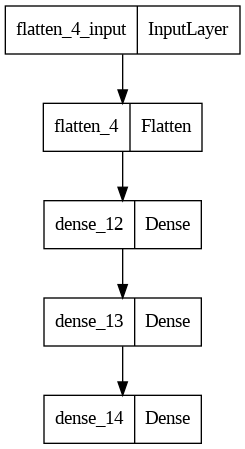

In [48]:
keras.utils.plot_model(model)

In [49]:
model.layers

In [50]:
hidden1 = model.layers[1]
hidden1

In [51]:
hidden1.name

'dense_12'

In [52]:
# model.get_layer('dense_2') is hidden1

In [53]:
weights,biases = hidden1.get_weights()

In [54]:
weights

array([[ 0.00610707,  0.02489594, -0.01536087, ...,  0.03783882,
        -0.05914966, -0.06133581],
       [ 0.01369452,  0.05928308,  0.03116106, ..., -0.03571224,
        -0.02952274, -0.03360376],
       [-0.04431498,  0.05148345,  0.03337209, ...,  0.02580851,
        -0.01906007,  0.01874843],
       ...,
       [ 0.00572571,  0.06257334,  0.06403539, ...,  0.02658766,
        -0.04927608, -0.01732978],
       [ 0.03742616,  0.00220877,  0.05876777, ..., -0.02097274,
        -0.01826614,  0.0622229 ],
       [-0.05461514,  0.07361314,  0.03424672, ...,  0.05991663,
        -0.06278661,  0.04765107]], dtype=float32)

In [55]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [56]:
weights.shape

(784, 300)

In [57]:
biases.shape

(300,)

In [58]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])

sigmoid函数通常用于二元分类任务，而softmax函数通常用于多元分类任务。

## 训练和评估模型

In [59]:
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_vaild,y_vaild))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7092 - accuracy: 0.7661 - val_loss: 0.5015 - val_accuracy: 0.8318
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4866 - accuracy: 0.8295 - val_loss: 0.4609 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8452 - val_loss: 0.4125 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4145 - accuracy: 0.8549 - val_loss: 0.3984 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3943 - accuracy: 0.8607 - val_loss: 0.3939 - val_accuracy: 0.8570
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3787 - accuracy: 0.8671 - val_loss: 0.3927 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3662 - accuracy: 0.8706 - val_loss: 0.3710 - val_accuracy:

In [60]:
!nvidia-smi

Fri Apr 28 16:40:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   1647MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

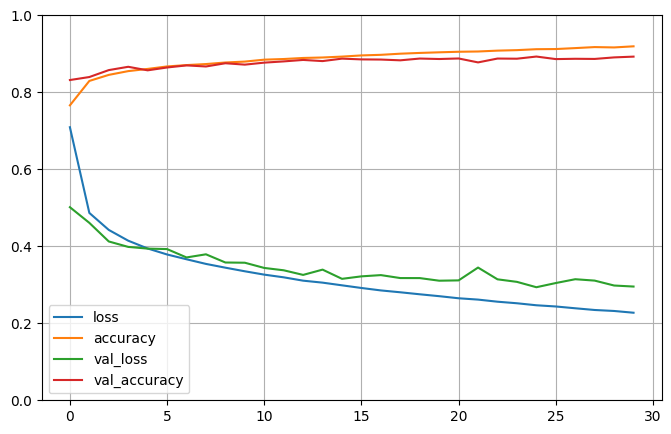

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [62]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.9919 - accuracy: 0.8535


[62.99193572998047, 0.8535000085830688]

In [63]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 57ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [70]:
import numpy as np
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
y_pred

1/1 [==============================] - 0s 30ms/step


array([9, 2, 1])

In [71]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)